# EE 559 Project 1

#### Comparing couple of images from MNIST dataset using DCNN.

In [1]:
import torch

from dlc_practical_prologue import *

from models import *
from training import *
from other import *

# Load the Dataset

In [2]:
#from six.moves import urllib    
#opener = urllib.request.build_opener()
#opener.addheaders = [('User-agent', 'Mozilla/5.0')]
#urllib.request.install_opener(opener)

N = 1000
train_input, train_target, train_classes, test_input, test_target, test_classes \
     = generate_pair_sets(N)

### Example

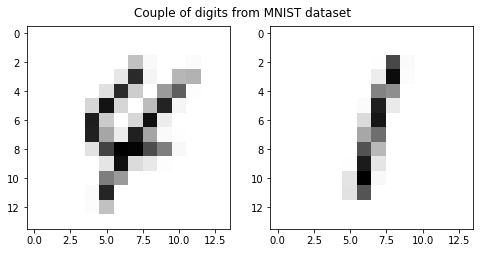

In [3]:
import matplotlib.pyplot as plt

torch.manual_seed(2)
n = torch.randint(1000,[1])[0]

fig, axs = plt.subplots(1,2, figsize=(8,10))
fig.subplots_adjust(top=1.5)
fig.suptitle('Couple of digits from MNIST dataset')
axs[0].imshow(train_input[n,0], cmap='Greys')
axs[1].imshow(train_input[n,1], cmap='Greys');


# MODEL 1
#### Model directly each couple of images of digits to the binary output (IneqNET)

C:\Users\Riccardo\Anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


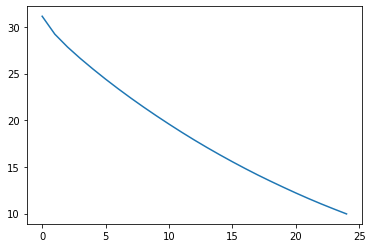

In [4]:
model = IneqNET()
train_losses = train_IneqNET(model, train_input, train_target);

plt.plot(train_losses);

In [5]:
predict_classes_perc = model(test_input)
_, predicted_classes = predict_classes_perc.max(1)
test_error = (predicted_classes-test_target).abs().sum() / N
print('Test error: {0:.3f} %'.format( test_error ))

Test error: 0.176 %


# MODEL 2
#### Firstly model each couple of images of digits to the digits that they represent and then evaluate their inequality. (DigiNET)

# MODEL 3
### Let's combine the first two approaches